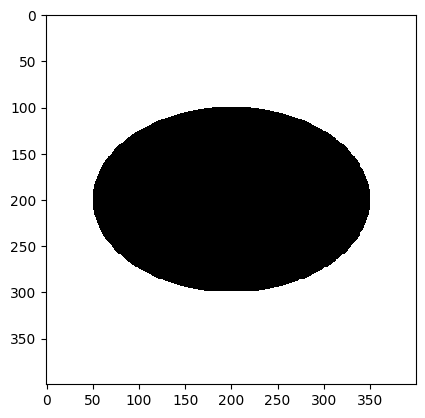

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

def elipse(n:int, m:int, O:list, a:int, b:int, fill:int = 1) -> np.array:
    """
    Funkcja rysujaca elipse na polu o podanych wymiarach [n x m].
    O srodku w punkcie O i podanych dlugosciach polosi a, b.
    Z mozliwoscia rysowania elipsy z oraz bez wypelnienia.
    Args:
        n (int): wymiar n zwracanej tablicy rgb
        m (int): wymiar m zwracanej tablicy rgb
        O (list): srodek elpipsy
        a (int): dlugosc pierwsza polos elpisy
        b (int): dlugosc druga polos elipsy
        fill (int, optional): Wartosc oznaczajaca czy rysowana elipsa ma byc wypelniona czy ma byc rysowany tylko obwod.
        Dla wartosci 1 rysowana jest wypelniona elipsa i jest to wartosc domyslna.
        Dla wartosci 0 rysowany jest obwod elipsy.
    Returns:
        numpy.Array: Tablica RBG z narysowana czarna elipsa na bialym tle
    """
    assert n > 0, "Tablica RGB musi posiadac wartosc n wiekszy od 0"
    assert m > 0, "Tablica RGB musi posiadac wartosc m wieksza od 0"
    assert a > 0, "Dlugosc polosi musi byc miec wartosc wieksza od 0"
    assert b > 0, "Dlugosc polosi musi byc miec wartosc wieksza od 0"
    assert fill == 0 or fill == 1, "Wartosc fill moze przyjmowac tylko wartosci 0 lub 1"
    assert O[0] <= n and O[1] <= m and O[0] >= 0 and O[1] >= 0, "Srodek elipsy musi znajdowac sie wewnatrz obszaru rysowania"
    
    RGB = np.zeros((n,m,3), dtype=np.uint8)
    RGB.fill(255)
    max_polos = max(a,b)
    ymin = max(0, O[1] - max_polos)
    ymax = min(m, O[1] + max_polos + 1)
    xmin = max(0, O[0] - max_polos)
    xmax = min(n, O[0] + max_polos + 1)
    
    for i in range(ymin, ymax):
        for j in range (xmin, xmax):  
            xx = j - O[0]
            yy = i - O[1]
            
            d = math.sqrt((xx * xx) / (a * a) + (yy * yy) / (b * b))
                 
            if fill == 1:
            
                if d< 1:
                    RGB[i,j] = 0
                     
            elif fill == 0:
                if d >= 0.98 and d < 1: 
                    RGB[i,j] = 255 - (255 * (d - 1))
    return RGB


data = elipse(400,400, [200,200], 150, 100 , 1)
plt.imshow(data, interpolation='none', aspect=1)
plt.show()
plt.imsave('test.png', data, format='png')